In [ ]:
# Convert Generator file to temporal dataset 

In [1]:
import numpy as np
import math

In [2]:
# normal distribution for integer
from scipy.stats import truncnorm
import matplotlib.pyplot as plt

In [7]:
with open('test.data.tra', 'r') as f:
    lines = f.read().splitlines()

In [8]:
# IBM data reading
item_numbers = {}
data = []
flag = 0
for line in lines:
    temp = []
    element_list = line.split(", ")
    #print("element_list:",element_list)

    for element in element_list:
        if element not in item_numbers:
            item_numbers[element] = 1
        temp.append(element)
    data.append(temp)
                
print("Datasize:",len(data))
print("Number of items:", len(item_numbers))
#print("items:", item_numbers)
print("First row of data:\n", data[0])
#print(data)

Datasize: 104924
Number of items: 30
First row of data:
 ['3', '5', '8', '11', '14', '17', '18', '21', '28']


In [9]:
# 用來確認兩次的調參有沒有確實改變到資料集的產生，很容易其實沒有調到
print("First row of data:\n", data[0])

First row of data:
 ['3', '5', '8', '11', '14', '17', '18', '21', '28']


In [10]:
# 用來檢查 -tlen
summer = 0
for row in data:
    summer += len(row)

print("average items per trans:", summer/len(data))

average items per trans: 10.13755670771225


In [11]:
w = open('item-2.txt', 'w+') 

# IBM generation


dataset = []
total_trans = len(data)

auto_pid = 0

# Tid insertion - Normal distribution
"""
tid_pool = []
for i in range(total_trans):
    tid = np.random.normal(0, 0.02) + 1
    tid = int(tid*20)
    tid_pool.append(tid)
    

# After normal distribution's tid not start from 1, so we need shifting
shift = min(tid_pool)
for i in range(0, len(tid_pool)):
    tid_pool[i] = tid_pool[i] - shift + 1
"""

# for graphing item' gain distribution
item_box = {}
profit_dis = []
total_gain = 0

for row in data:
    
    # Using set to filter repeat items in one transaction
    #row = list(set(row))
    
    # Profit insertion - Log normal distribution
    #profit = int(np.random.lognormal(mean=7, sigma=0.5, size=None)) + 5 
    profit = int(np.random.normal(loc=100, scale=20, size=None))
    profit_dis.append(profit)
    total_gain += profit
    
    trans_str = ""
    for item in row:
        trans_str = trans_str + str(item) + ", "
        
        if int(item) not in item_box:
            item_box[int(item)] = profit
        else:
            item_box[int(item)] += profit
    
    
    # TID_PID_ITEMS_PROFIT
    trans_str = trans_str.rstrip(", ") 
    trans_str = str(profit) + "_" + trans_str
    #trans_str = trans_str.split(" ")
    
    # pid auto
    auto_pid = auto_pid + 1
    
    dataset.append(trans_str)

# Sort transaction by Tid in ascending order - then it will be normal distribute
#dataset = sorted(dataset, key=lambda dataset: dataset[0], reverse=False)

# Final - write the dataset in to the .txt file
for row in dataset:
    trans_str = ""
    #for i in range(0, len(row)):
        #trans_str = trans_str + row[i] + " "
    trans_str = trans_str + row + "\n"
    w.write(trans_str)

# Just in case, check the program really work.
print(trans_str)
f.close()
w.close()

'''#print("tid: ", min(tid_pool),"-",max(tid_pool))

fre = {}
for i in tid_pool:
    if i not in fre:
        fre[i] = 1
    else:
        fre[i] += 1
print(fre)


# Print the tid distribution
plt.title("tid distribution")
plt.hist(tid_pool,  color = 'lightblue')
plt.xlim(min(tid_pool), max(tid_pool))'''


69_0, 9, 15, 16, 17, 21, 28, 29



'#print("tid: ", min(tid_pool),"-",max(tid_pool))\n\nfre = {}\nfor i in tid_pool:\n    if i not in fre:\n        fre[i] = 1\n    else:\n        fre[i] += 1\nprint(fre)\n\n\n# Print the tid distribution\nplt.title("tid distribution")\nplt.hist(tid_pool,  color = \'lightblue\')\nplt.xlim(min(tid_pool), max(tid_pool))'

(200349.0, 7030094.0)

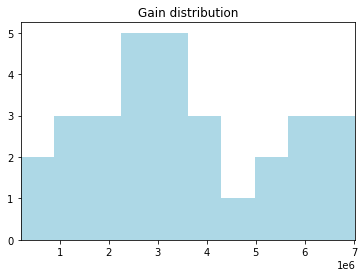

In [12]:
# 用來觀察每個 items 的 gain 分布 ((可以用來判斷參數設定優劣

item_box = dict(sorted(item_box.items(), key=lambda item:item[0]))
item_box_2 = []

for item, gain in item_box.items():
    item_box_2.append(gain)



# Print the tid distribution
plt.title("Gain distribution")
plt.hist(item_box_2,  color = 'lightblue')
plt.xlim(min(item_box_2), max(item_box_2))

(7.0, 186.0)

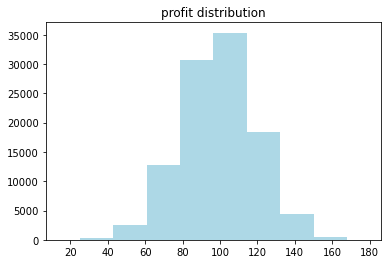

In [13]:
# Print the profit distribution
plt.title("profit distribution")
plt.hist(profit_dis,  color = 'lightblue')
plt.xlim(min(profit_dis), max(profit_dis))

In [ ]:
tygyyu

In [69]:
r = open('C:/Users/User/Desktop/t-8.txt', 'r') 
w = open('C:/Users/User/Desktop/t-9.txt', 'w+')
lines = r.read().splitlines()
add = 0.001
element_list = []

for line in lines:
    temp = []
    temp = line.split("_")
    temp[1] = round(float(temp[1]) + add,10)
    element_list.append(temp)

for element in element_list:
    threshold_str = ""
    threshold = element[1]
    threshold_str = threshold_str + element[0] + "_" + repr(threshold) + "\n"
    w.write(threshold_str)
         

'''item_num = input("Please enter number of items:")
item_num = int(item_num)
threshold_dis = []

for item in range(item_num):
    threshold_str = ""
    threshold = float(np.random.random()/2)
    #threshold = float(np.random.lognormal(mean=0.001, sigma=0.35, size=None))
    threshold = round(threshold, 2)
    threshold_dis.append(threshold)
    threshold_str = threshold_str + str(item) + "_" + str(threshold) + "\n"
    print(threshold_str,end='')
    w.write(threshold_str)
    

# Print the threshold distribution
plt.title("threshold distribution")
plt.hist(threshold_dis,  color = 'lightblue')
plt.xlim(min(threshold_dis), max(threshold_dis))'''

r.close()
w.close()

In [88]:
for i in range (2,9):
    r = open('C:/Users/User/Desktop/t-1.txt', 'r') 
    w = open('C:/Users/User/Desktop/t-' + str(i) +'.txt', 'w+')
    lines = r.read().splitlines()
    add = 0.01 * (i-1)
    element_list = []
    
    for line in lines:
        temp = []
        temp = line.split("_")
        temp[1] = round(float(temp[1]) + add,10)
        element_list.append(temp)

    for element in element_list:
        threshold_str = ""
        threshold = element[1]
        threshold_str = threshold_str + element[0] + "_" + repr(threshold) + "\n"
        w.write(threshold_str)
    r.close()
    w.close()

'''item_num = input("Please enter number of items:")
item_num = int(item_num)
threshold_dis = []

for item in range(item_num):
    threshold_str = ""
    threshold = float(np.random.random()/2)
    #threshold = float(np.random.lognormal(mean=0.001, sigma=0.35, size=None))
    threshold = round(threshold, 2)
    threshold_dis.append(threshold)
    threshold_str = threshold_str + str(item) + "_" + str(threshold) + "\n"
    print(threshold_str,end='')
    w.write(threshold_str)
    

# Print the threshold distribution
plt.title("threshold distribution")
plt.hist(threshold_dis,  color = 'lightblue')
plt.xlim(min(threshold_dis), max(threshold_dis))'''






'item_num = input("Please enter number of items:")\nitem_num = int(item_num)\nthreshold_dis = []\n\nfor item in range(item_num):\n    threshold_str = ""\n    threshold = float(np.random.random()/2)\n    #threshold = float(np.random.lognormal(mean=0.001, sigma=0.35, size=None))\n    threshold = round(threshold, 2)\n    threshold_dis.append(threshold)\n    threshold_str = threshold_str + str(item) + "_" + str(threshold) + "\n"\n    print(threshold_str,end=\'\')\n    w.write(threshold_str)\n    \n\n# Print the threshold distribution\nplt.title("threshold distribution")\nplt.hist(threshold_dis,  color = \'lightblue\')\nplt.xlim(min(threshold_dis), max(threshold_dis))'

3 59439 18863 153 

tid:  1 - 3
{2: 58859, 3: 379, 1: 363}


(1, 3)

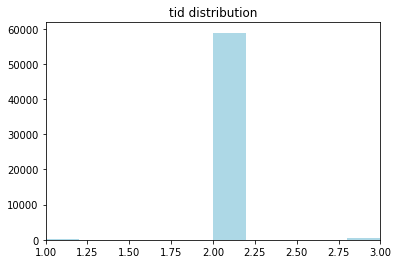

In [13]:
# webview transform
with open('webview1.txt', 'r') as f:
    lines = f.read().splitlines()
w = open('D:/graduate/temporal/webview1.txt', 'w+') 

dataset = []
data = []
total_trans = len(lines)


# Tid insertion - Normal distribution
tid_pool = []
for i in range(total_trans):
    tid = np.random.normal(0, 0.02) + 1
    tid = int(tid*20)
    if(tid > 3):
        tid = tid - 1
    tid_pool.append(tid)
    
# After normal distribution's tid not start from 1, so we need shifting
shift = min(tid_pool)
for i in range(0, len(tid_pool)):
    tid_pool[i] = tid_pool[i] - shift + 1

for i in range(0, len(tid_pool)):
    if(tid_pool[i]>2):
        tid_pool[i] = tid_pool[i] - 1
    
    
auto_pid = 0
for row in lines:
    
    row = row.split(" ")
    trans_str = ""
    for item in row:
        if(item == "-1" or item == "-2"):
            continue
        trans_str = trans_str + item + " "
        
    # Profit insertion - Log normal distribution
    profit = int(np.random.lognormal(mean=5, sigma=0.025, size=None)) + 5 
    
    # TID_PID_ITEMS_PROFIT
    trans_str = str(tid_pool[auto_pid]) + " " + str(auto_pid) + " " + trans_str + str(profit)
    trans_str = trans_str.split(" ")

    # pid auto
    auto_pid = auto_pid + 1
    
    dataset.append(trans_str)
    
dataset = sorted(dataset, key=lambda dataset: dataset[0], reverse=False)


# Final - write the dataset in to the .txt file
for row in dataset:
    trans_str = ""
    for i in range(0, len(row)):
        trans_str = trans_str + row[i] + " "
    trans_str = trans_str + "\n"
    w.write(trans_str)

# Just in case, check the program really work.
print(trans_str)
f.close()
w.close()


print("tid: ", min(tid_pool),"-",max(tid_pool))

fre = {}
for i in tid_pool:
    if i not in fre:
        fre[i] = 1
    else:
        fre[i] += 1
print(fre)

# Print the tid distribution
plt.title("tid distribution")
plt.hist(tid_pool,  color = 'lightblue')
plt.xlim(min(tid_pool), max(tid_pool))

In [ ]:
plt.title("Profit range")
plt.hist(data, density=False, color = 'lightblue', cumulative = False)
plt.xlim(min(data), max(data))

In [ ]:
data = []
for i in range(50000):
    profit = int(np.random.lognormal(mean=5, sigma=0.0025, size=None))
    data.append(profit)
    
plt.title("Profit range")
plt.hist(data, density=False, color = 'lightblue', cumulative = False)
plt.xlim(min(data), max(data))

{}


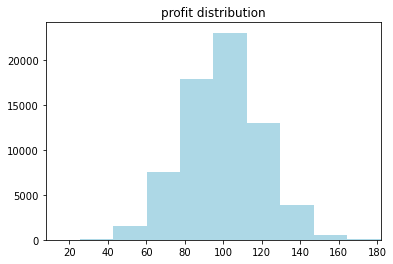

In [3]:
with open('connect.txt', 'r') as f:
    lines = f.read().splitlines()
w = open('connect-.txt', 'w+') 

# chess transformation
dataset = []
total_trans = len(lines)
profit_dis = []
item_box = {}

'''
# Tid insertion - Normal distribution
tid_pool = []
for i in range(total_trans):
    tid = np.random.normal(0, 0.02) + 1
    tid = int(tid*20)
    tid_pool.append(tid)
    
# After normal distribution's tid not start from 1, so we need shifting
shift = min(tid_pool)
for i in range(0, len(tid_pool)):
    tid_pool[i] = tid_pool[i] - shift + 1
'''
for item in range(1,129):
    item_box[item] = 0


auto_pid = 0
for row in lines:
    
    row=row.rstrip()
    element_list = row.split(" ")
    trans_str = ""
    for item in row:
        trans_str += item
    for element in element_list:
        if int(element) in item_box:
            del item_box[int(element)]
        
    # Profit insertion - Log normal distribution
    #profit = int(np.random.lognormal(mean=5, sigma=0.025, size=None)) + 5
    profit = int(np.random.normal(loc=100, scale=20, size=None))
    profit_dis.append(profit)
    
    # TID_PID_ITEMS_PROFIT
    #trans_str = str(tid_pool[auto_pid]) + " " + str(auto_pid) + " " + trans_str + str(profit)
    trans_str = trans_str.rstrip()
    trans_str = trans_str.replace(" ", ", ")
    trans_str = str(profit) + "_" + trans_str + "\n"
    #print(trans_str)
    w.write(trans_str)
    #dataset.append(trans_str)

f.close()
w.close()


'''
# Final - write the dataset in to the .txt file
for row in dataset:
    trans_str = ""
    for i in range(0, len(row)):
        trans_str = trans_str + row[i] + " "
    trans_str = trans_str + "\n"
    w.write(trans_str)

# Just in case, check the program really work.
print(trans_str)
f.close()
w.close()

    # pid auto
    auto_pid = auto_pid + 1
    
    dataset.append(trans_str)

# Sort transaction by Tid in ascending order - then it will be normal distribute
dataset = sorted(dataset, key=lambda dataset: dataset[0], reverse=False)

# Final - write the dataset in to the .txt file
for row in dataset:
    trans_str = ""
    for i in range(0, len(row)):
        trans_str = trans_str + row[i] + " "
    trans_str = trans_str + "\n"
    w.write(trans_str)

# Just in case, check the program really work.
print(trans_str)
f.close()
w.close()


print("tid: ", min(tid_pool),"-",max(tid_pool))

fre = {}
for i in tid_pool:
    if i not in fre:
        fre[i] = 1
    else:
        fre[i] += 1
print(fre)

# Print the tid distribution
plt.title("tid distribution")
plt.hist(tid_pool,  color = 'lightblue')
plt.xlim(min(tid_pool), max(tid_pool))
'''
# Print the profit distribution
plt.title("profit distribution")
plt.hist(profit_dis,  color = 'lightblue')
plt.xlim(min(profit_dis), max(profit_dis))

print(item_box)

In [31]:
with open('mushrooms.txt', 'r') as f:
    lines = f.read().splitlines()
w = open('mushrooms-.txt', 'w+') 

4 8095 1 7 12 21 24 31 36 39 41 47 55 63 66 70 79 88 90 94 98 104 114 118 122 152 

tid:  1 - 4
{3: 4212, 2: 4100, 4: 45, 1: 59}


(1.0, 4.0)

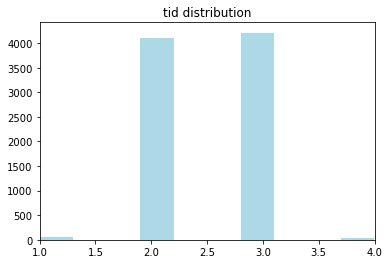

In [32]:
# chess transformation
dataset = []
total_trans = len(lines)

# Tid insertion - Normal distribution
tid_pool = []
for i in range(total_trans):
    tid = np.random.normal(0, 0.02) + 1
    tid = int(tid*20)
    tid_pool.append(tid)
    
# After normal distribution's tid not start from 1, so we need shifting
shift = min(tid_pool)
for i in range(0, len(tid_pool)):
    tid_pool[i] = tid_pool[i] - shift + 1


auto_pid = 0
for row in lines:
    
    trans_str = ""
    for item in row:
        trans_str += item
        
    # Profit insertion - Log normal distribution
    profit = int(np.random.lognormal(mean=5, sigma=0.025, size=None)) + 5 
    
    # TID_PID_ITEMS_PROFIT
    trans_str = str(tid_pool[auto_pid]) + " " + str(auto_pid) + " " + trans_str + str(profit)
    trans_str = trans_str.split(" ")
    
    
    # pid auto
    auto_pid = auto_pid + 1
    
    dataset.append(trans_str)

# Sort transaction by Tid in ascending order - then it will be normal distribute
dataset = sorted(dataset, key=lambda dataset: dataset[0], reverse=False)

# Final - write the dataset in to the .txt file
for row in dataset:
    trans_str = ""
    for i in range(0, len(row)):
        trans_str = trans_str + row[i] + " "
    trans_str = trans_str + "\n"
    w.write(trans_str)

# Just in case, check the program really work.
print(trans_str)
f.close()
w.close()


print("tid: ", min(tid_pool),"-",max(tid_pool))

fre = {}
for i in tid_pool:
    if i not in fre:
        fre[i] = 1
    else:
        fre[i] += 1
print(fre)

# Print the tid distribution
plt.title("tid distribution")
plt.hist(tid_pool,  color = 'lightblue')
plt.xlim(min(tid_pool), max(tid_pool))

0_0.1446
1_0.1962
2_0.1212
3_0.1549
4_0.1953
5_0.1482
6_0.1937
7_0.1178
8_0.1415
9_0.1426
10_0.1271
11_0.1474
12_0.1482
13_0.1393
14_0.1789
15_0.1505
16_0.1479
17_0.1659
18_0.1058
19_0.1089
20_0.1842
21_0.1367
22_0.1294
23_0.1725
24_0.1708
25_0.1887
26_0.1624
27_0.1047
28_0.1208
29_0.113
30_0.114
31_0.1583
32_0.1618
33_0.1611
34_0.1059
35_0.1208
36_0.1601
37_0.1606
38_0.1672
39_0.1193
40_0.1783
41_0.1584
42_0.1679
43_0.1651
44_0.1329
45_0.1846
46_0.1858
47_0.1056
48_0.1137
49_0.1399
50_0.1775
51_0.1007
52_0.108
53_0.1002
54_0.1727
55_0.1257
56_0.1808
57_0.1378
58_0.1983
59_0.1237


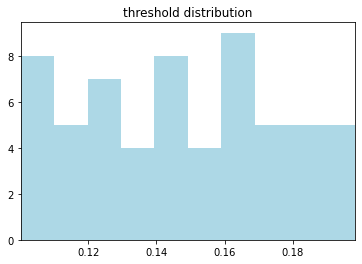

In [90]:
w = open('C:/Users/User/Desktop/threshold-2.txt', 'w+') 

"""
item_num = input("Please enter number of items:")
item_num = int(item_num)
"""
item_num = 60
threshold_dis = []

for item in range(item_num):
    threshold_str = ""
    #threshold = float(np.random.random()/2)
    #threshold = float(np.random.lognormal(mean=0.001, sigma=0.35, size=None))
    threshold = np.random.uniform(0.1,0.2)
    threshold = round(threshold, 4)
    threshold_dis.append(threshold)
    threshold_str = threshold_str + str(item) + "_" + str(threshold) + "\n"
    print(threshold_str,end='')
    w.write(threshold_str)
    

# Print the threshold distribution
plt.title("threshold distribution")
plt.hist(threshold_dis,  color = 'lightblue')
plt.xlim(min(threshold_dis), max(threshold_dis))

w.close()


In [55]:
w = open('I0.05D4T15.txt', 'w+') 

# IBM generation


dataset = []
total_trans = len(data)

auto_pid = 0

# Tid insertion - Normal distribution
"""
tid_pool = []
for i in range(total_trans):
    tid = np.random.normal(0, 0.02) + 1
    tid = int(tid*20)
    tid_pool.append(tid)
    

# After normal distribution's tid not start from 1, so we need shifting
shift = min(tid_pool)
for i in range(0, len(tid_pool)):
    tid_pool[i] = tid_pool[i] - shift + 1
"""

# for graphing item' gain distribution
item_box = {}
profit_dis = []
total_gain = 0

for row in data:
    
    # Using set to filter repeat items in one transaction
    row = list(set(row))
    
    # Profit insertion - Log normal distribution
    profit = int(np.random.lognormal(mean=5, sigma=0.5, size=None)) + 5 
    profit_dis.append(profit)
    total_gain += profit
    
    trans_str = ""
    for item in row:
        trans_str = trans_str + str(item) + " "
        
        if int(item) not in item_box:
            item_box[int(item)] = profit
        else:
            item_box[int(item)] += profit
    
    
    # TID_PID_ITEMS_PROFIT
    trans_str = str(profit) + "_" + trans_str
    #trans_str = trans_str.split(" ")
    
    # pid auto
    auto_pid = auto_pid + 1
    
    dataset.append(trans_str)

# Sort transaction by Tid in ascending order - then it will be normal distribute
#dataset = sorted(dataset, key=lambda dataset: dataset[0], reverse=False)

# Final - write the dataset in to the .txt file
for row in dataset:
    trans_str = ""
    #for i in range(0, len(row)):
        #trans_str = trans_str + row[i] + " "
    trans_str = trans_str + row + "\n"
    w.write(trans_str)

# Just in case, check the program really work.
print(trans_str)
f.close()
w.close()

'''#print("tid: ", min(tid_pool),"-",max(tid_pool))

fre = {}
for i in tid_pool:
    if i not in fre:
        fre[i] = 1
    else:
        fre[i] += 1
print(fre)


# Print the tid distribution
plt.title("tid distribution")
plt.hist(tid_pool,  color = 'lightblue')
plt.xlim(min(tid_pool), max(tid_pool))'''


194_40 10 43 3 42 24 31 11 



'#print("tid: ", min(tid_pool),"-",max(tid_pool))\n\nfre = {}\nfor i in tid_pool:\n    if i not in fre:\n        fre[i] = 1\n    else:\n        fre[i] += 1\nprint(fre)\n\n\n# Print the tid distribution\nplt.title("tid distribution")\nplt.hist(tid_pool,  color = \'lightblue\')\nplt.xlim(min(tid_pool), max(tid_pool))'